# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения.

In [1]:
import scipy.stats
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
print(A)

[[ 0 77 45 ... 30 20 47]
 [56 91 86 ... 31  1 22]
 [59 78 90 ... 71 69 26]
 ...
 [73 29 16 ... 45 12 74]
 [17 30 66 ... 43 41 29]
 [48 31 45 ... 73 85 16]]


# Задание 2.1 (2 балла) +

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
print(A[:,np.random.permutation(len(A[0]))])

[[19 15 31 ... 39 28 66]
 [43 86 54 ... 17 24 71]
 [30 57 32 ... 63  0 28]
 ...
 [ 1 77 59 ... 93 34 38]
 [74 37 23 ... 50  7 62]
 [40 95 40 ... 81 86 67]]


# Задание 2.2 (5 баллов) +

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых:
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$)

In [3]:
print(A[np.sum(A[:,::2],axis=1)>np.mean(np.sum(A[:,1::2],axis=1))])

[[ 2 85 81 ... 98 77 49]
 [84 91  2 ... 99 28 82]
 [99 76 55 ... 64 32 15]
 ...
 [73 29 16 ... 45 12 74]
 [17 30 66 ... 43 41 29]
 [48 31 45 ... 73 85 16]]


# Задача 2.3 (3 балла) +

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [4]:
min_max = np.max(A,axis=1)-np.min(A,axis=1)
np.argwhere(min_max==np.max(min_max)).reshape(-1)

array([  2,   3,   7,   8,  16,  24,  27,  31,  36,  37,  42,  43,  45,
        54,  62,  68,  74,  93, 106, 107, 111, 121, 122, 125, 129, 140,
       150, 152, 153, 160, 170, 172, 176, 177, 180, 191], dtype=int64)

# Задание 2.4 (7 баллов) +

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [5]:
print((A.flatten().argsort().argsort()+1).reshape(200,50))

[[   1 7730 4469 ... 3012 2041 4675]
 [5568 9102 8710 ... 3147  180 2156]
 [5946 7875 9078 ... 7161 6937 2615]
 ...
 [7424 2920 1605 ... 4511 1271 7459]
 [1758 3037 6593 ... 4363 4125 2915]
 [4820 3124 4543 ... 7399 8555 1654]]


# Задание 2.5 (2 балла) +

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$.

In [6]:
print(((A.T-np.min(A, axis=1))/(np.max(A,axis=1)-np.min(A,axis=1))).T)

[[0.         0.79381443 0.46391753 ... 0.30927835 0.20618557 0.48453608]
 [0.61111111 1.         0.94444444 ... 0.33333333 0.         0.23333333]
 [0.5959596  0.78787879 0.90909091 ... 0.71717172 0.6969697  0.26262626]
 ...
 [0.74226804 0.28865979 0.15463918 ... 0.45360825 0.11340206 0.75257732]
 [0.17346939 0.30612245 0.67346939 ... 0.43877551 0.41836735 0.29591837]
 [0.4494382  0.25842697 0.41573034 ... 0.73033708 0.86516854 0.08988764]]


# Задание 2.6 (2 балла) +

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [7]:
print((np.arange(10)+1).repeat(200*50).reshape(10,200,50)*A)

[[[  0  77  45 ...  30  20  47]
  [ 56  91  86 ...  31   1  22]
  [ 59  78  90 ...  71  69  26]
  ...
  [ 73  29  16 ...  45  12  74]
  [ 17  30  66 ...  43  41  29]
  [ 48  31  45 ...  73  85  16]]

 [[  0 154  90 ...  60  40  94]
  [112 182 172 ...  62   2  44]
  [118 156 180 ... 142 138  52]
  ...
  [146  58  32 ...  90  24 148]
  [ 34  60 132 ...  86  82  58]
  [ 96  62  90 ... 146 170  32]]

 [[  0 231 135 ...  90  60 141]
  [168 273 258 ...  93   3  66]
  [177 234 270 ... 213 207  78]
  ...
  [219  87  48 ... 135  36 222]
  [ 51  90 198 ... 129 123  87]
  [144  93 135 ... 219 255  48]]

 ...

 [[  0 616 360 ... 240 160 376]
  [448 728 688 ... 248   8 176]
  [472 624 720 ... 568 552 208]
  ...
  [584 232 128 ... 360  96 592]
  [136 240 528 ... 344 328 232]
  [384 248 360 ... 584 680 128]]

 [[  0 693 405 ... 270 180 423]
  [504 819 774 ... 279   9 198]
  [531 702 810 ... 639 621 234]
  ...
  [657 261 144 ... 405 108 666]
  [153 270 594 ... 387 369 261]
  [432 279 405 ... 657 765 1

# Задание 2.7 (2 балла) +

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)

In [8]:
print(np.concatenate((A[:,::2],A[:,1::2]),axis=1))

[[ 0 45 75 ... 77 30 47]
 [56 86 13 ... 79 31 22]
 [59 90 58 ... 99 71 26]
 ...
 [73 16 63 ... 81 45 74]
 [17 66 33 ... 22 43 29]
 [48 45 90 ... 49 73 16]]


# Задание 2.8 (2 балла) +

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html)

In [9]:
print(sum(np.all(A>5,axis=1)))

8


# Задание 2.9 (2 балла) +

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [10]:
print(np.mean(np.split(A,10),axis=0))

[[48.2 51.7 65.4 39.8 52.8 56.5 55.6 52.2 52.8 40.5 46.  52.2 35.4 51.1
  51.4 57.1 46.1 48.9 52.6 49.8 57.3 46.1 42.  63.7 27.  50.8 35.6 55.6
  54.5 37.9 61.9 60.8 36.4 49.3 50.  49.6 55.3 43.1 61.6 46.4 44.4 62.
  47.6 39.4 39.1 61.8 51.4 51.  44.6 51.9]
 [55.1 48.5 54.6 36.2 54.5 64.8 36.6 37.7 25.8 56.1 53.8 39.4 50.  53.4
  59.7 38.3 62.  42.7 45.7 47.2 44.5 37.5 45.1 61.  55.2 57.4 57.9 66.
  61.5 51.5 46.8 49.9 44.7 51.1 44.9 48.8 46.9 43.6 56.  67.3 42.2 59.9
  61.5 38.8 56.9 54.4 62.2 39.5 47.9 59.4]
 [51.8 59.5 57.7 48.1 44.2 52.1 60.1 38.8 59.7 52.  52.5 43.3 42.1 51.7
  43.2 50.  38.1 72.5 33.7 57.4 43.2 49.6 52.7 37.2 54.9 40.4 58.7 54.5
  37.2 27.9 56.3 42.2 51.8 66.2 53.  73.6 31.8 53.9 34.9 43.7 44.6 42.1
  44.6 47.5 43.3 63.6 44.3 52.7 54.  49. ]
 [47.5 43.3 52.4 59.3 41.2 60.5 50.2 38.5 60.9 40.9 58.6 54.2 46.4 53.7
  56.3 34.6 43.7 36.4 48.  63.4 40.2 68.8 41.4 53.2 40.6 62.8 48.3 49.5
  45.4 51.1 42.  59.1 44.6 40.5 31.  40.4 46.2 56.1 39.1 55.6 47.7 34.
  35.2 56.

# Задание 2.10 (4 балла) +

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [11]:
ff=A.flatten()
dd=np.unique(A.flatten(),return_index=True)
print(ff[sorted(dd[1])])

[ 0 77 45 38 75  2 80 52 70 93 19 60 83  9  6 51 97 15 49  4 95 28 20 31
 87 62 39 14 89 90 12 91 37 66 56 29 72 30 47 86 59 13 26 11 22 41 43 40
 76 32 17 55 16 21 74 24 69 33 54 35 71 63 34 79 65  1 78  8 58  5 50 53
 85  7  3 68 61 99 57 98 67 46 94 82 25 27 44 42 10 96 88 18 81 92 73 84
 23 48 64 36]


# Задание 2.11 (3 балла) +

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [12]:
np.linalg.norm(A-np.mean(A,axis=0),axis=1)

array([209.79479289, 175.00767162, 206.470543  , 220.67327687,
       198.67723857, 173.40177371, 230.58637237, 211.00823473,
       196.36528493, 182.39798553, 208.13492048, 208.19290364,
       204.55714391, 194.47433025, 208.36087715, 218.86873949,
       212.54316062, 198.34486413, 202.24459233, 192.5402169 ,
       219.32228597, 198.11010859, 185.03849633, 224.04859992,
       190.15174237, 205.31969006, 199.78679918, 211.99845548,
       196.77328357, 191.88292036, 189.1633028 , 202.43461938,
       195.96082549, 185.08521044, 202.89572476, 198.07929   ,
       228.74578712, 212.86940862, 221.2368304 , 205.22995669,
       201.73404553, 225.19261783, 204.85893958, 200.60133381,
       198.55474088, 191.10498456, 214.23436962, 203.21128198,
       201.95718637, 213.30613007, 217.47463099, 197.79546285,
       220.29016121, 213.43271803, 233.50936839, 209.5486462 ,
       194.28153573, 180.27649632, 201.31459243, 198.11255671,
       216.12171368, 191.96672921, 225.53754704, 207.94

# Задание 2.12 (2 балла) +

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [13]:
print(np.where(A<50,A*2,A*3))

[[  0 231  90 ...  60  40  94]
 [168 273 258 ...  62   2  44]
 [177 234 270 ... 213 207  52]
 ...
 [219  58  32 ...  90  24 222]
 [ 34  60 198 ...  86  82  58]
 [ 96  62  90 ... 219 255  32]]


# Задание 2.13 (7 баллов) +

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [14]:
def skolz(n,dan):
    mask=np.ones(n)/n
    return np.convolve(dan,mask,"valid")
def full(mas,n):
    return np.insert(mas,len(mas),np.zeros(n))
ff=A.flatten()
tri=skolz(3,ff)
fiv=skolz(5,ff)
ten = skolz(10,ff)
fiv=full(fiv,(len(tri)-len(fiv)))
ten=full(ten,(len(tri)-len(ten)))
print(tri+fiv+ten)


[132.16666667 159.43333333 145.36666667 ... 127.4         79.
  58.        ]


# Задание 2.14 (8 баллов) +

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

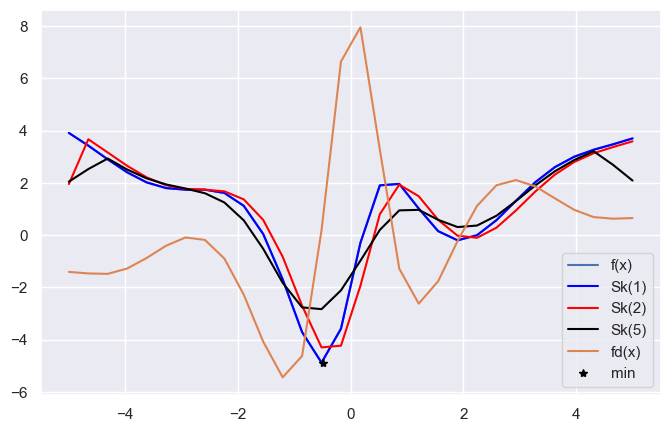

In [15]:
from scipy import optimize
def skolz(n,dan):
    mask=np.ones(n)/n
    return np.convolve(dan,mask,"same")
def f(x):
    return np.divide((5*np.sin(2*x)-np.power(np.cos(x),2) - 1 +np.power(np.abs(x),3) - np.power(x,2)),(np.power(x,2)+1))
x= np.linspace(-5,5,30)
y = f(x)
fig, ax = plt.subplots()
ax.plot(x,y,label="f(x)")
ax.plot(x,skolz(1,y),color="blue",label="Sk(1)")
ax.plot(x,skolz(2,y),color="red",label="Sk(2)")
ax.plot(x,skolz(5,y),color= "black",label="Sk(5)")
ax.plot(x,np.gradient(y,x),label="fd(x)")
mina=optimize.golden(f,brack=(-5,5))
ax.plot(mina,f(mina),"*",c="black",label="min")
ax.legend()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()


# Задание 2.15 (10 баллов) +

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [16]:
from typing import List

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0

    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1

        res.append(idx)
    return res


s1=sample([50, 3, 1, 7, 20,23], 500)



Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

Mean: 2.306
Variense: 4.912363999999999
St Diviation: 2.21638534555704
Mean: 2.162
Variense: 4.771756
St Diviation: 2.184434938376513
KstestResult(statistic=0.038, pvalue=0.8636766933110154)


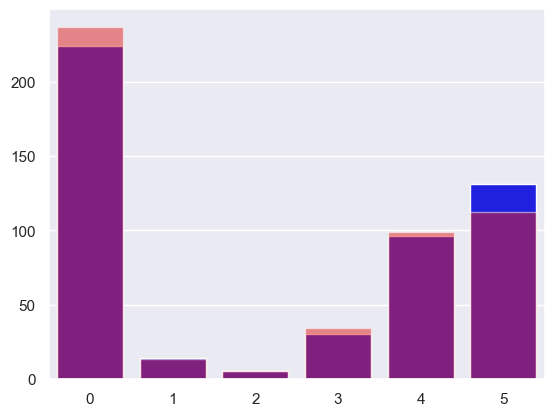

In [17]:
from scipy import stats
def stat(x):
    print("Mean:",np.mean(x))
    print("Variense:",np.var(x))
    print("St Diviation:",np.std(x))

def samp(x,n:int):
    b=np.divide(x,sum(x))
    return(np.random.choice(len(x),n,p=b))


s2=samp([50, 3, 1, 7, 20,23], 500)
stat(s1)
stat(s2)
s1=np.array(s1)

sns.barplot(x=np.unique(s1),y=np.unique(s1,return_counts=True)[1],color="blue",alpha=1)
sns.barplot(x=np.unique(s2),y=np.unique(s2,return_counts=True)[1],color="red",alpha=0.5)
print(stats.ks_2samp(s1,s2))

# Задание 2.16 (5 баллов) +

Есть следующий алгоритм "случайного блуждания"

In [18]:
import random

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2217

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков.

numpy быстрее в: 6.02 раз


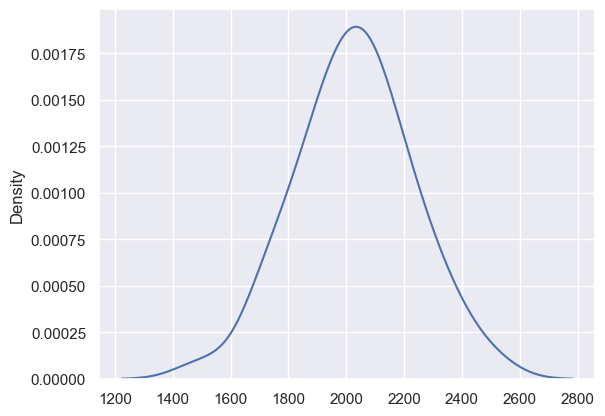

In [19]:
import time

def wlk(n):
    return sum(np.random.choice([-3, -1, 0, 2, 3],n))
start_time = time.time()
wlk(10_000)
end = time.time()-start_time
start_time = time.time()
walk(10_000)
print("numpy быстрее в: %.2f раз" % ((time.time()-start_time)/end))
nn=np.zeros(50)
for i in range(50):
    nn[i]=wlk(10000)
sns.kdeplot(data=nn)
x=np.ones(100)*10000


# Задание 2.17 (5 баллов) +

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [20]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x1 = a.shape[0]
    y1 = a.shape[1]

    t = 1.
    for y in range(y1 - 5):
        for x in range(x1 - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t






Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org) +
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов) +
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [21]:
from numba import njit

@njit
def strange_conv1(a: npt.NDArray[np.float64]) -> np.float64:
    x1 = a.shape[0]
    y1 = a.shape[1]

    t = 1.
    for y in range(y1 - 5):
        for x in range(x1 - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

In [22]:
import taichi as ti
ti.init(arch=ti.cpu)
# t1=ti.field(ti.f64,shape=1)
@ti.kernel
def strange_conv2(a: ti.types.ndarray()) -> ti.f64:
    len1 = a.shape[0]
    len2 = a.shape[1]
    t = 1
    # ti.loop_config(serialize=True)
    for y in range(len2 - 5):
        for x in range(len1 - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c
    return t


[Taichi] version 1.2.1, llvm 10.0.0, commit 12ab828a, win, python 3.10.0
[Taichi] Starting on arch=x64


In [23]:
# %load_ext Cython

In [24]:
# %%cython
# def strange_conv2(a):
#     x = a.shape[0]
#     y = a.shape[1]
#
#     t = 1.
#     for y in range(y - 5):
#         for x in range(x - 3):
#             c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
#             t = 0.2 * t + 0.8 * c
#
#     return t

In [25]:
gg=np.random.randint(0,11,size=(10,10))
%timeit strange_conv(gg)
%timeit strange_conv1(gg)
%timeit strange_conv2(gg)


124 µs ± 6.65 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
The slowest run took 26.00 times longer than the fastest. This could mean that an intermediate result is being cached.
1.91 µs ± 3.47 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
112 µs ± 6.89 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
